In [1]:
import requests
import numpy as np
import pandas as pd

In [2]:
final = pd.DataFrame()
for i in range(1,9):
  string = str(i) + '.csv' 
  df = pd.read_csv(string)
  final = final.append(df, ignore_index = True) 
#final['Education Required'].loc[(final['Education Required'] == 's degree')|(final['Education Required'] == 'bachelors degree')] = 'bachelor degree'
final = final.iloc[:,1:]
final = final.replace('None',np.nan)
final['Minimum Experience Required'] = final['Minimum Experience Required'] .replace(99,np.nan)
final = final.replace('none',np.nan)
display(final.head(10))

,title,company,salary,link,description,location,Minimum Experience Required,Education Required
0,Data Analyst,Garage Living,31.25,https://ca.indeed.com/viewjob/pagead/clk?mo=r&...,[],"Vaughan, ON",NaN,NaN
1,NaN,eBay Inc.,NaN,https://ca.indeed.com/viewjob/cmp/Ebay-Inc.,[],"Toronto, ON",NaN,NaN
2,Junior Data Analyst,Q & A BP Consulting,22.92,https://ca.indeed.com/viewjob/company/Q-&-A-BP...,[],"Vaughan, ON",NaN,NaN
3,Data Engineer/Analyst,RCN Call Center Services,NaN,https://ca.indeed.com/viewjob/pagead/clk?mo=r&...,[],"Montréal, QC",NaN,NaN
4,Data Analyst/Financial Analyst,Sunnyfuture Group,28.85,https://ca.indeed.com/viewjob/company/SunnyFut...,[],"Toronto, ON",NaN,NaN
5,Junior Data Science Analyst,Entuitive,NaN,https://ca.indeed.com/viewjob?jk=4b0a0f66424bb...,"['building', 'experience', 'data', 'performanc...","Toronto, ON",1.0,NaN
6,Sr Data Management Analyst,Client Of Emergitel,90.0,https://ca.indeed.com/viewjob/pagead/clk?mo=r&...,[],"Toronto, ON",NaN,NaN
7,Google Data Engineering Certified - Data Analyst,Client Of Emergitel,90.0,https://ca.indeed.com/viewjob/pagead/clk?mo=r&...,[],"Toronto, ON",NaN,NaN
8,Data Reporting Analyst,Small Business BC,27.26,https://ca.indeed.com/viewjob/company/Small-Bu...,[],"Vancouver, BC",NaN,NaN
9,Marketing Data Analyst,Vigorate Digital Solutions,NaN,https://ca.indeed.com/viewjob/pagead/clk?mo=r&...,[],"Toronto, ON",NaN,NaN


In [3]:
display(final.describe())

,Minimum Experience Required
count,526.000000
mean,3.233840
std,2.143534
min,0.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,25.000000


In [4]:
final = final.drop_duplicates()

In [5]:
labels = final['Education Required'].unique() 

#secondary degree
#Bachelor degree
#graduate degree, #master degree
#postgraduate degree
display(labels)

array([nan, 'bachelors degree', 'university degree', 's degree',
       'secondary degree', 'college degree', 'undergraduate degree',
       'or degree', 'some degree', 'a degree', 'high degree',
       'higher degree', 's degree technical degree', 'year degree',
       'bs degree', 'masters degree', 'bachelor degree', 'varying degree',
       's degree university degree', 'secondary degree s degree',
       'undergraduate degree equivalent degree', 'graduate degree',
       'business degree', 'bachelors degree university degree',
       'university degree college degree',
       'bachelor degree college degree', 'university degree s degree',
       'of degree', 's degree s degree',
       'bachelors degree masters degree', 'earned degree',
       'related degree', 'auniversity degree',
       'secondary degree related degree',
       'university degree technical degree',
       'bachelor degree equivalent degree', 'science degree',
       'university degree graduate degree', 'ba degre

In [6]:
def summerize_degree(dgr):
  if dgr is np.nan:
    return "undefine"
  if ("college" in dgr) | ("secondary" in dgr):
    return "secondary"
  if  ("doctor" in dgr)| ("post" in dgr):
    return "postgraduate"
  if ("master" in dgr) | ("graduate"  in dgr):
    return "graduate"
  if "high" in dgr:
    return "graduate"

  if "bachelor" in dgr:
    return "university"

  if ("college" in dgr) | ("secondary" in dgr):
    return "secondary"

  else: return "university"

final['Education Required'] = final['Education Required'].apply(summerize_degree)

In [7]:
labels = final['Education Required'].unique() 
display(labels)

array(['undefine', 'university', 'secondary', 'graduate', 'postgraduate'],
      dtype=object)

In [8]:
temp = final.loc[:,['salary','location','Minimum Experience Required']]
visualizable_feature_names = temp.columns #

labels = final['Education Required'].unique() 

import plotly.graph_objects as go

fig_hist = []
for i, feature_name in enumerate(visualizable_feature_names):
    fig_hist.append(go.Figure())
    for label in labels:
        fig_hist[i].add_trace(go.Histogram(x= final[final['Education Required']==label][feature_name], name=label))
    fig_hist[i].update_layout(height=400, width=800, title_text=feature_name)
    fig_hist[i].update_layout(barmode='overlay')
    fig_hist[i].update_traces(opacity=0.5)
    fig_hist[i].show()

In [9]:
final['Education Required'].value_counts()

undefine        1317
university       282
graduate          60
secondary         37
postgraduate       1
Name: Education Required, dtype: int64

In [10]:
df = pd.DataFrame({'number': [28,216, 77,1]}, index=['secondary', 'university','graduate','post graduate'])

In [11]:
display(final[final['Minimum Experience Required']>20])

,title,company,salary,link,description,location,Minimum Experience Required,Education Required
59,Data Analyst,Intouch Insight,NaN,https://ca.indeed.com/viewjob?jk=02da0dba3689c...,"['experience', 'experiences', 'experi', 'compa...","Laval, QC",25.0,university


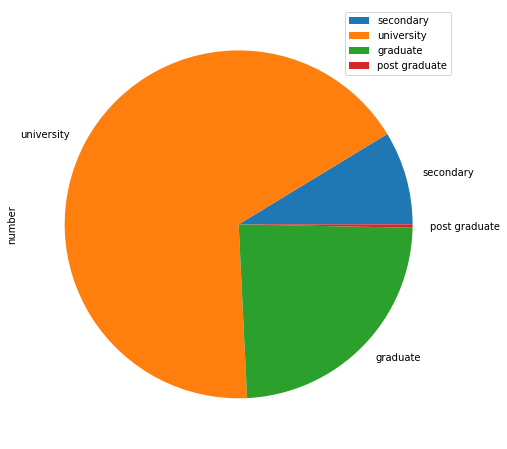

In [12]:
plot = df.plot.pie(subplots=True, figsize=(11, 8))

In [13]:
def boolean_df(item_lists, unique_items):
# Create empty dict
    bool_dict = {}
    
    # Loop through all the tags
    for i, item in enumerate(unique_items):
        
        # Apply boolean mask
        bool_dict[item] = item_lists.apply(lambda x: item in x)
            
    # Return the results as a dataframe
    return pd.DataFrame(bool_dict)

fi = final
fi["description"] = fi["description"].apply(eval)

fi_dict = {}
for i in fi["description"]:
    for j in i:
        if j not in fi_dict:
            fi_dict[j] = 1
        else:
            fi_dict[j] += 1

def to_1D(series):
 return pd.Series([x for _list in series for x in _list])

to_1D(fi["description"]).value_counts().head(10)


experience       351
skills           189
excellent        167
business         156
data             146
excel            110
communication     97
management        92
strong            92
program           65
dtype: int64

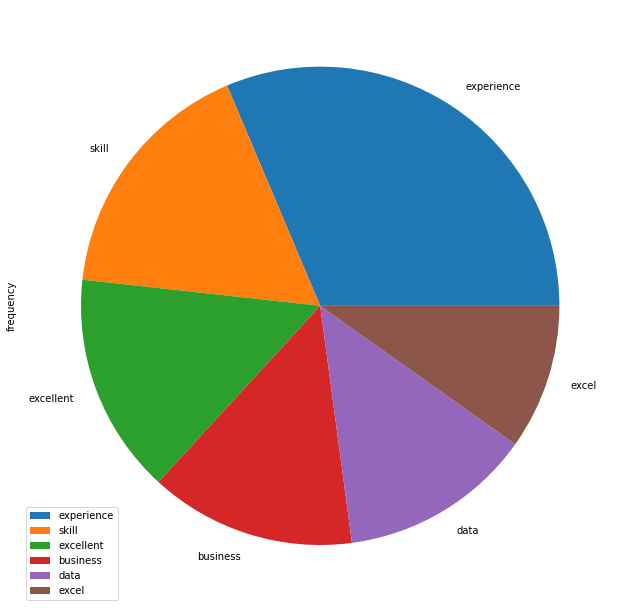

In [15]:
dc = pd.DataFrame({'frequency': [351,189,167,156,146,110]}, index=['experience', 'skill','excellent','business','data','excel'])
plot = dc.plot.pie(subplots=True, figsize=(11,11))

In [16]:
display(final.head(15))

,title,company,salary,link,description,location,Minimum Experience Required,Education Required
0,Data Analyst,Garage Living,31.25,https://ca.indeed.com/viewjob/pagead/clk?mo=r&...,[],"Vaughan, ON",NaN,undefine
1,NaN,eBay Inc.,NaN,https://ca.indeed.com/viewjob/cmp/Ebay-Inc.,[],"Toronto, ON",NaN,undefine
2,Junior Data Analyst,Q & A BP Consulting,22.92,https://ca.indeed.com/viewjob/company/Q-&-A-BP...,[],"Vaughan, ON",NaN,undefine
3,Data Engineer/Analyst,RCN Call Center Services,NaN,https://ca.indeed.com/viewjob/pagead/clk?mo=r&...,[],"Montréal, QC",NaN,undefine
4,Data Analyst/Financial Analyst,Sunnyfuture Group,28.85,https://ca.indeed.com/viewjob/company/SunnyFut...,[],"Toronto, ON",NaN,undefine
5,Junior Data Science Analyst,Entuitive,NaN,https://ca.indeed.com/viewjob?jk=4b0a0f66424bb...,"[building, experience, data, performance, engi...","Toronto, ON",1.0,undefine
6,Sr Data Management Analyst,Client Of Emergitel,90.0,https://ca.indeed.com/viewjob/pagead/clk?mo=r&...,[],"Toronto, ON",NaN,undefine
7,Google Data Engineering Certified - Data Analyst,Client Of Emergitel,90.0,https://ca.indeed.com/viewjob/pagead/clk?mo=r&...,[],"Toronto, ON",NaN,undefine
8,Data Reporting Analyst,Small Business BC,27.26,https://ca.indeed.com/viewjob/company/Small-Bu...,[],"Vancouver, BC",NaN,undefine
9,Marketing Data Analyst,Vigorate Digital Solutions,NaN,https://ca.indeed.com/viewjob/pagead/clk?mo=r&...,[],"Toronto, ON",NaN,undefine


#Data Cleaned(cleaned)

1.   Encoding all data 
2.   List item



In [17]:
cleaned = final.loc[:,['location','Minimum Experience Required','Education Required','company']]

In [18]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [19]:
cleaned['location'] = le.fit_transform(cleaned['location'])

In [20]:
cleaned['company'] = le.fit_transform(cleaned['company'])


1.   secondary
2.   university
3.   graduate
4.   postgraduate
5.   Undefine

In [21]:
def int_degree(dgr):
  if dgr is np.nan:
    return np.nan
  if ("college" in dgr) | ("secondary" in dgr):
    return 1
  if  ("doctor" in dgr)| ("post" in dgr):
    return 4
  if ("master" in dgr) | ("graduate"  in dgr):
    return 3
  if "high" in dgr:
    return 3

  if "bachelor" in dgr:
    return 2

  if ("college" in dgr) | ("secondary" in dgr):
    return 1

  else: return 2
cleaned['Education Required'] = cleaned['Education Required'].apply(int_degree)

In [22]:
cleaned['Education Required'] = le.fit_transform(cleaned['Education Required'])

In [23]:
cleaned = (cleaned - cleaned.mean())/ cleaned.std()#.astype(int)/2
display(cleaned)

,location,Minimum Experience Required,Education Required,company
0,0.884248,NaN,-0.060479,-0.140297
1,0.764097,NaN,-0.060479,1.713590
2,0.884248,NaN,-0.060479,0.865924
3,-0.317264,NaN,-0.060479,0.920809
4,0.764097,NaN,-0.060479,1.268413
...,...,...,...,...
2063,0.764097,NaN,-0.060479,-1.073339
2064,-0.437416,NaN,-0.060479,-1.134322
2065,1.044450,NaN,-0.060479,-1.177010
2066,0.764097,NaN,-0.060479,-1.177010


In [27]:
cleaned['salary'] = final['salary']
cleaned = cleaned.dropna(subset=['salary'])


display(cleaned)

,location,Minimum Experience Required,Education Required,company,salary
0,0.884248,NaN,-0.060479,-0.140297,31.25
2,0.884248,NaN,-0.060479,0.865924,22.92
4,0.764097,NaN,-0.060479,1.268413,28.85
6,0.764097,NaN,-0.060479,-0.591572,90.0
7,0.764097,NaN,-0.060479,-0.591572,90.0
...,...,...,...,...,...
1933,-0.637668,NaN,-0.060479,1.609918,17.79
1934,0.844198,NaN,-0.060479,-0.591572,90.0
1935,0.764097,NaN,-0.060479,-0.591572,90.0
1936,-2.319786,NaN,-0.060479,-0.256165,19.95


In [30]:
cleaned['salary'] = le.fit_transform(cleaned['salary'])
display(cleaned)

,location,Minimum Experience Required,Education Required,company,salary
0,0.884248,NaN,-0.060479,-0.140297,28
2,0.884248,NaN,-0.060479,0.865924,11
4,0.764097,NaN,-0.060479,1.268413,21
6,0.764097,NaN,-0.060479,-0.591572,73
7,0.764097,NaN,-0.060479,-0.591572,73
...,...,...,...,...,...
1933,-0.637668,NaN,-0.060479,1.609918,3
1934,0.844198,NaN,-0.060479,-0.591572,73
1935,0.764097,NaN,-0.060479,-0.591572,73
1936,-2.319786,NaN,-0.060479,-0.256165,4


,location,Minimum Experience Required,Education Required,company,salary
location,1.000000,0.620158,0.124895,0.156106,0.345127
Minimum Experience Required,0.620158,1.000000,-0.066748,-0.002567,0.144722
Education Required,0.124895,-0.066748,1.000000,0.100970,0.078602
company,0.156106,-0.002567,0.100970,1.000000,-0.281874
salary,0.345127,0.144722,0.078602,-0.281874,1.000000


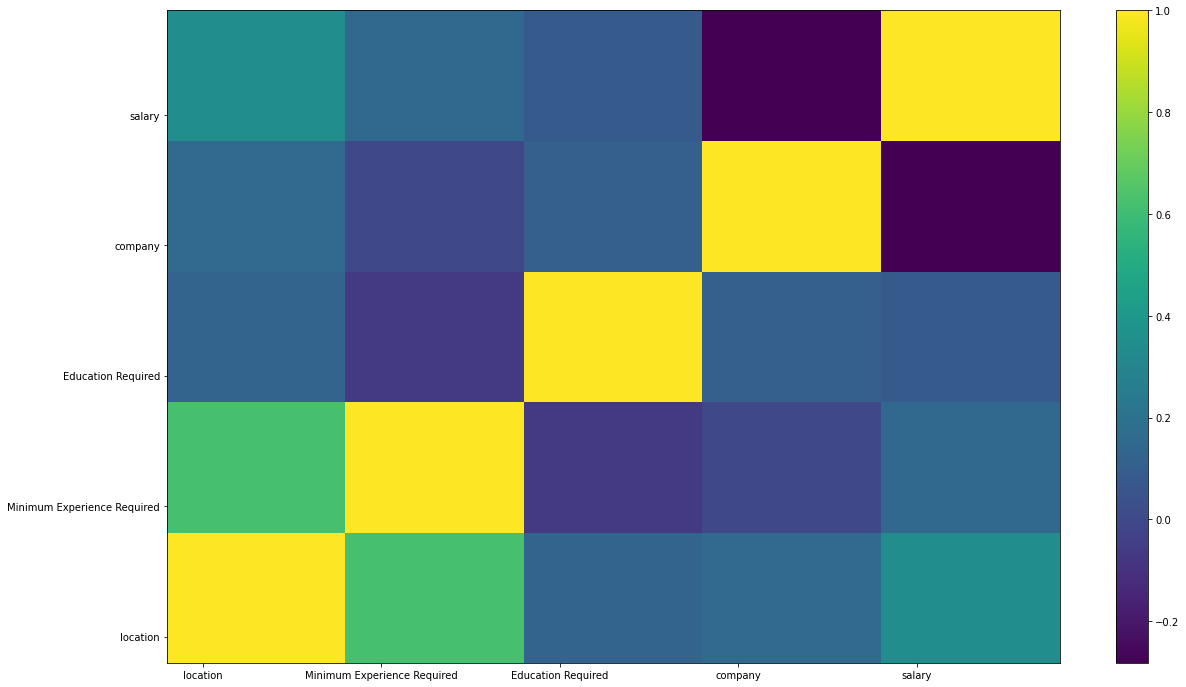

In [31]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20,12))
corr = cleaned.corr()
display(corr)
c = plt.pcolor(corr)
plt.yticks(np.arange(0.2, len(corr.index), 1), corr.index)
plt.xticks(np.arange(0.2, len(corr.columns), 1), corr.columns)
fig.colorbar(c)

In [32]:
visualizable_feature_names = temp.columns[0:3] #

num_visualizable_features = len(visualizable_feature_names)

fig_scatmat = go.Figure(data=go.Splom(
                        dimensions=[dict(label=feature, values=cleaned[feature]) \
                                    for feature in visualizable_feature_names], \
                        text=None,
                        marker=dict(color= None, showscale=False, line_color='white', line_width=0.5)))

fig_scatmat.update_layout(title='Pairwise feature scatter plots', \
                  width=400 * num_visualizable_features, \
                  height=400 * num_visualizable_features)

fig_scatmat.show()